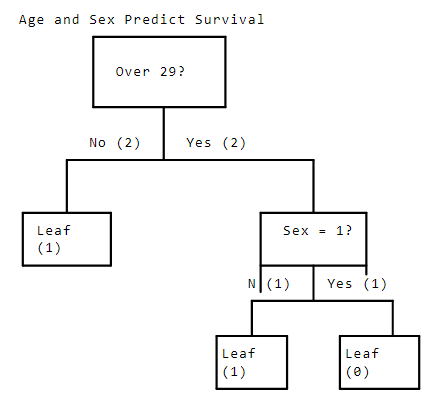

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

y_pred_class = dtc.predict(X_test)

In [5]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class)

0.97368421052631582

### Dealing with overfitting: min_samples_split
<ul>
                        <li>default min_samples_split=2<ul>
                            <li>This means if you've 1 sample left in a node, you cannot split further</li>
                            <li>When it gets really deep in depth, it overfits your data</li>
                        </ul>
                        </li>
                        <li>If you increase your min_samples_split value<ul>
                            <li>You would decrease the depth of your tree</li>
                            <li>This is because you would run out of samples to split </li>
                            <li>This would reduce overfitting</li>
                        </ul>

### Using GridSearchCV for optimizing parameters

In [6]:
from sklearn.model_selection import GridSearchCV

#### FYI
sample_split_range = list(range(2,10))

param_grid = dict(min_samples_split = sample_split_range)

print param_grid

{'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]}

In [7]:
sample_split_range = list(range(2, 50))

In [8]:
param_grid = dict(min_samples_split=sample_split_range)

In [9]:
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')

In [10]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

#### examine the best model

In [11]:
# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

0.973214285714
{'min_samples_split': 4}


In [12]:
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')


Decision trees have a major flaw—they overfit to the training data. 

Because we build up a very "deep" decision tree in terms of splits, we end up with a lot of rules that are specific to the quirks of the training data, and not generalizable to new data sets.